Dataset shape: (569, 30)
Number of features: 30
Number of samples: 569
Number of classes: 2
Class distribution: [212 357]


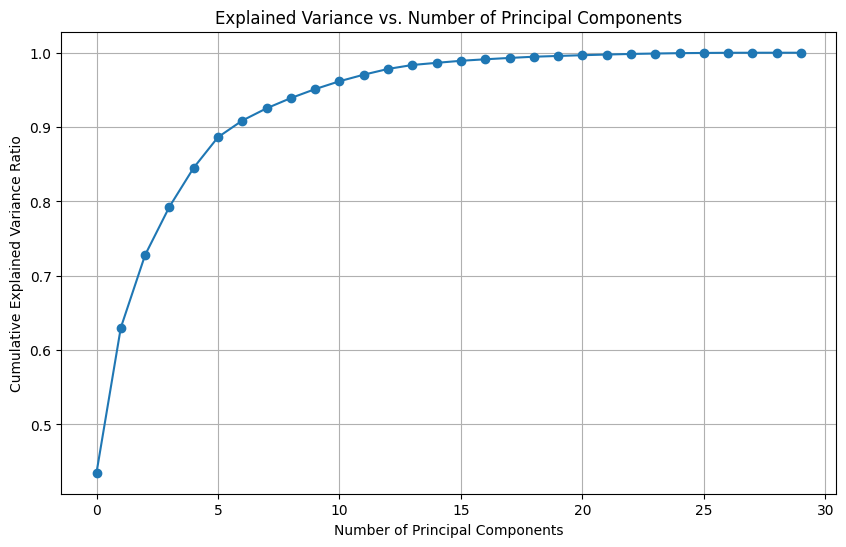

Number of components needed to capture 95% of variance: 10
K=1: Accuracy=0.9474, Precision=0.9333, Recall=0.9859, F1=0.9589
K=2: Accuracy=0.9912, Precision=0.9861, Recall=1.0000, F1=0.9930
K=3: Accuracy=0.9825, Precision=0.9726, Recall=1.0000, F1=0.9861
K=4: Accuracy=0.9737, Precision=0.9722, Recall=0.9859, F1=0.9790
K=5: Accuracy=0.9825, Precision=0.9859, Recall=0.9859, F1=0.9859
K=6: Accuracy=0.9825, Precision=0.9859, Recall=0.9859, F1=0.9859
K=7: Accuracy=0.9825, Precision=0.9859, Recall=0.9859, F1=0.9859
K=8: Accuracy=0.9912, Precision=0.9861, Recall=1.0000, F1=0.9930
K=9: Accuracy=0.9825, Precision=0.9859, Recall=0.9859, F1=0.9859
K=10: Accuracy=0.9825, Precision=0.9859, Recall=0.9859, F1=0.9859
K=11: Accuracy=0.9912, Precision=0.9861, Recall=1.0000, F1=0.9930
K=12: Accuracy=0.9912, Precision=0.9861, Recall=1.0000, F1=0.9930
K=13: Accuracy=0.9825, Precision=0.9859, Recall=0.9859, F1=0.9859
K=14: Accuracy=0.9912, Precision=0.9861, Recall=1.0000, F1=0.9930
K=15: Accuracy=0.9912, Pre

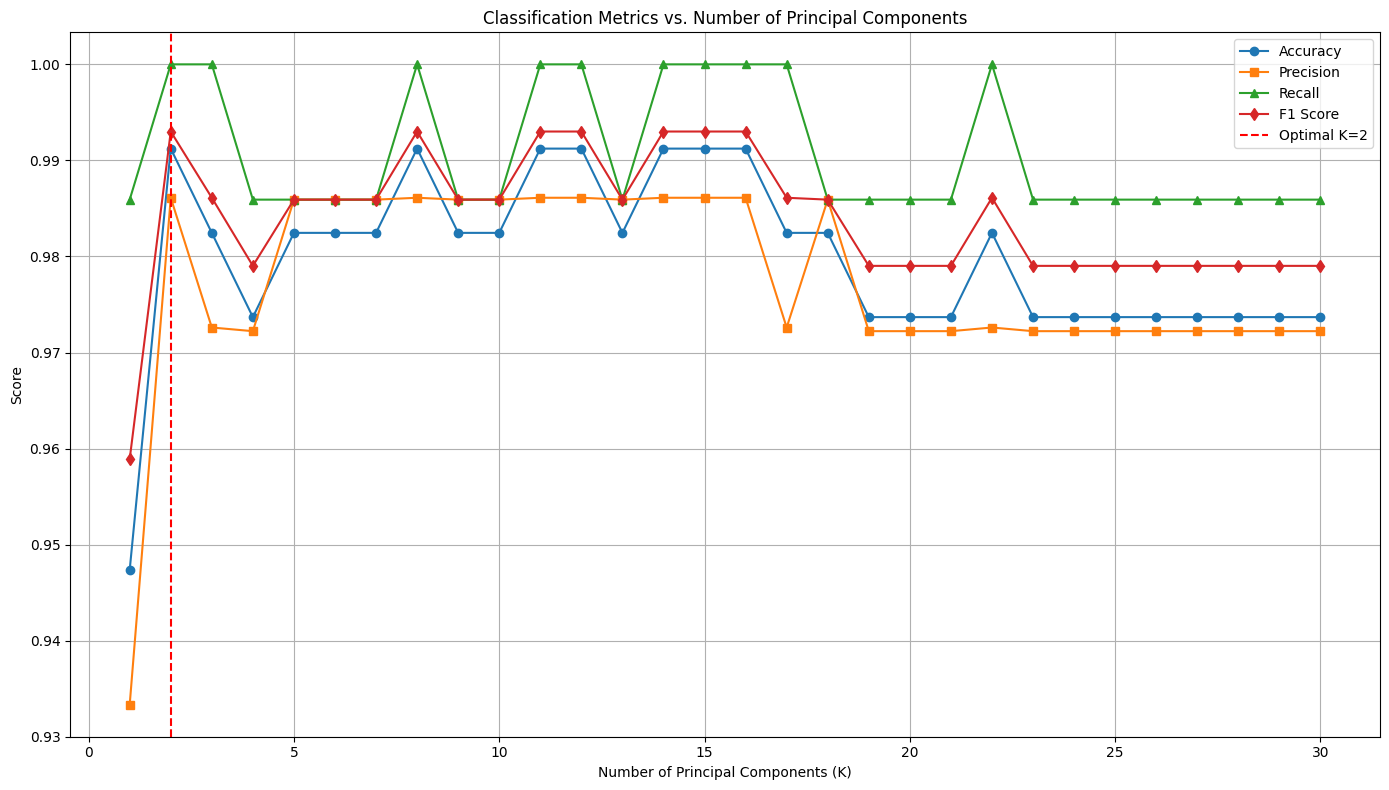

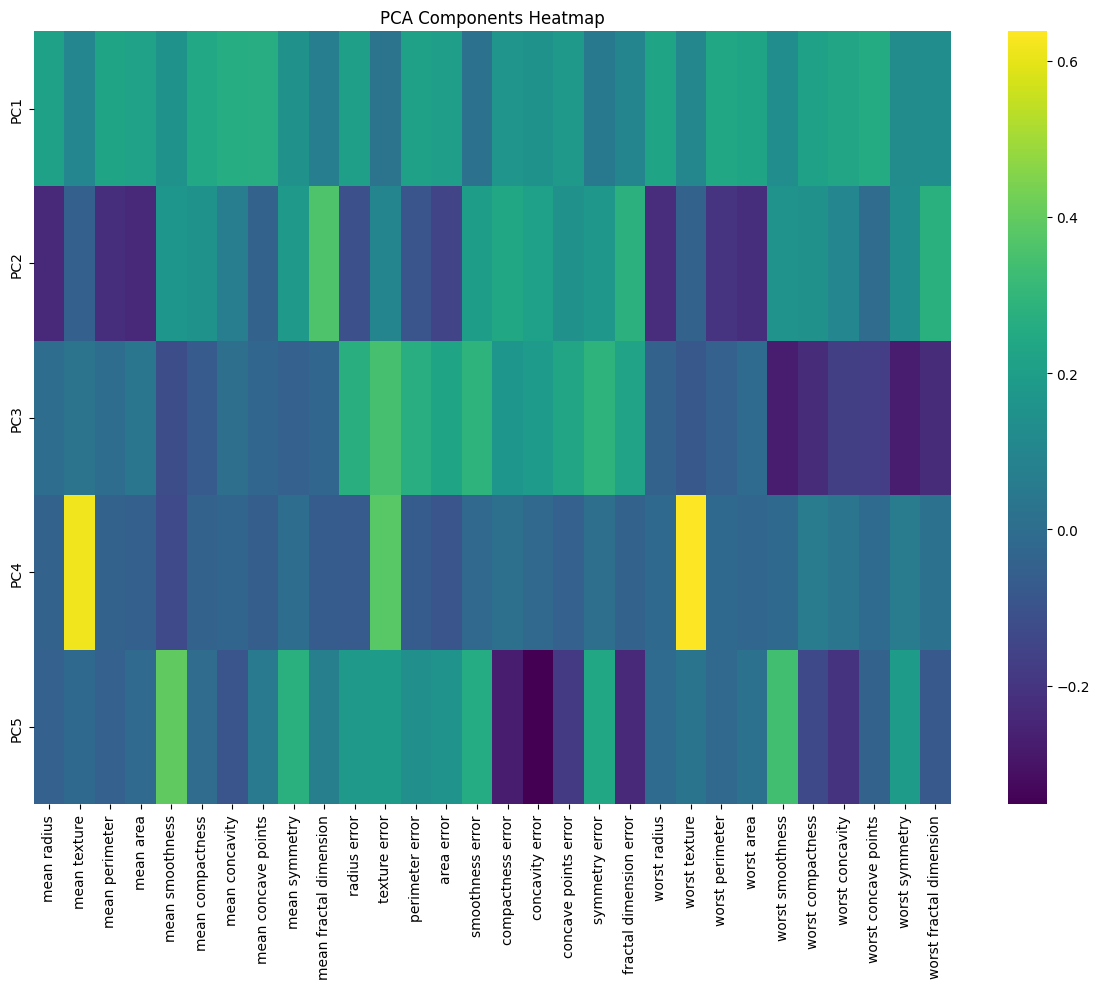


--- Final Model with Optimal PCA Components ---
Number of Components: 2
Accuracy: 0.9912
Precision: 0.9861
Recall: 1.0000
F1 Score: 0.9930

Classification Report:
              precision    recall  f1-score   support

   Malignant       1.00      0.98      0.99        43
      Benign       0.99      1.00      0.99        71

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



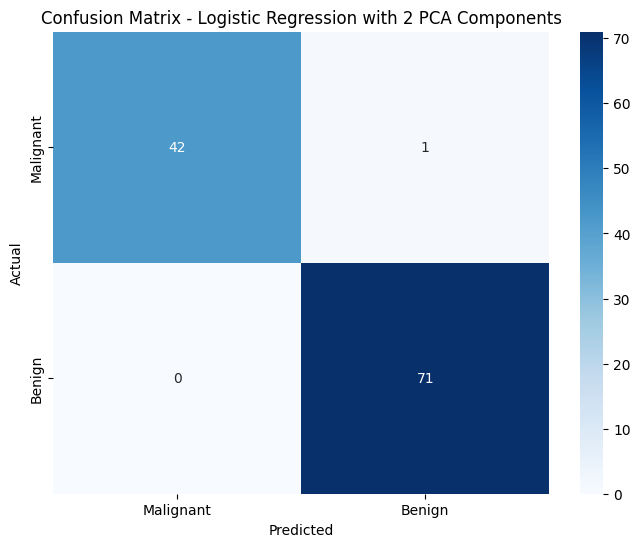

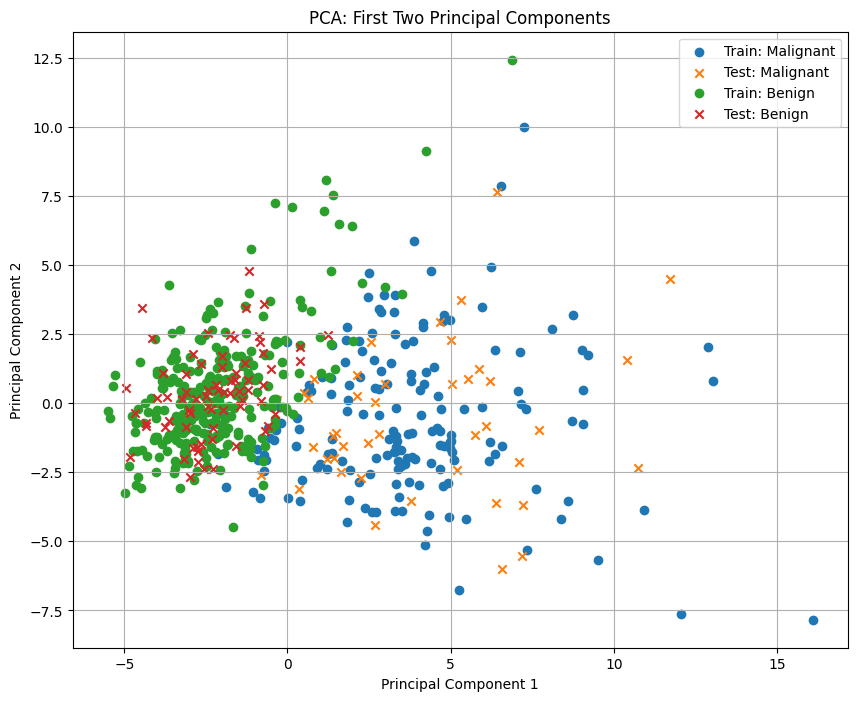

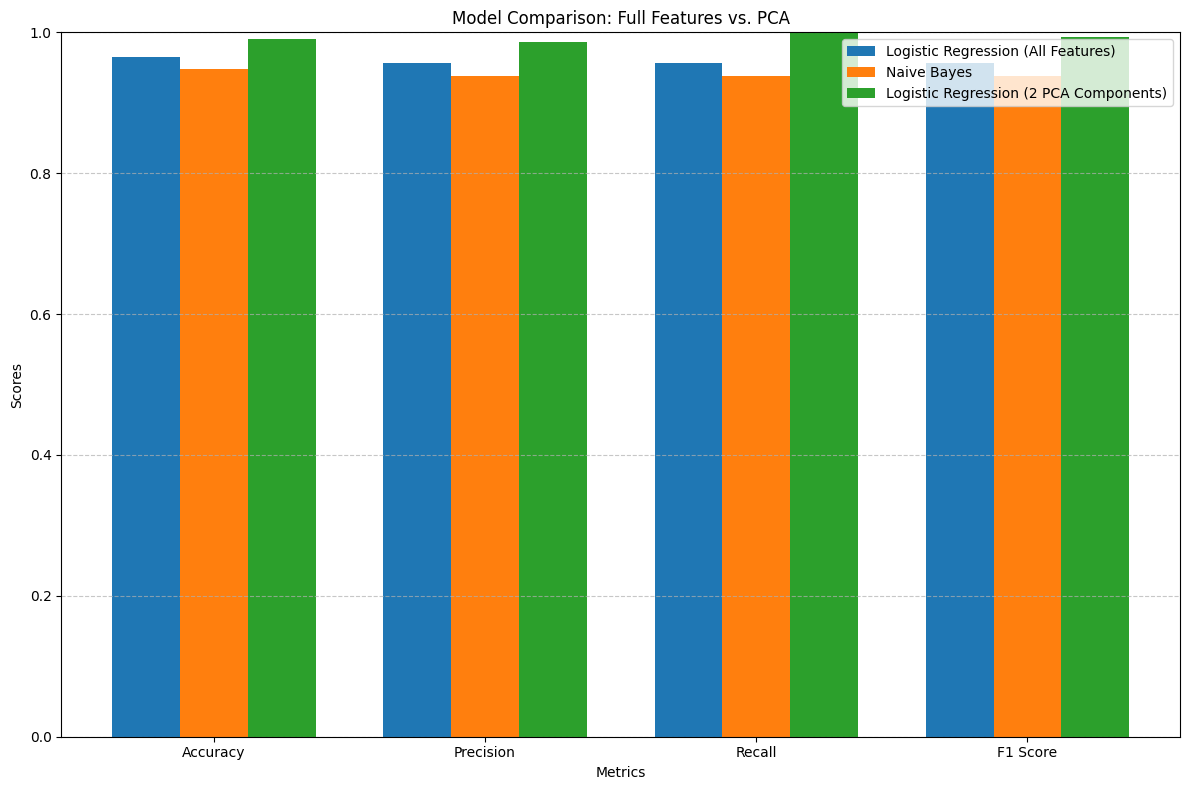


--- Comparison Analysis: Full Features vs. PCA ---
Metric       | LR (All Features) | Naive Bayes | LR (2 PCA Components)
-------------|-------------------|-------------|---------------------------
Accuracy     | 0.9649            | 0.9474      | 0.9912
Precision    | 0.9565            | 0.9375      | 0.9861
Recall       | 0.9565            | 0.9375      | 1.0000
F1 Score     | 0.9565            | 0.9375      | 0.9930

Analysis:

In this comparison between the full-feature Logistic Regression, Naive Bayes, and PCA-optimized Logistic Regression:

1. Performance Comparison:
   - The optimal PCA model uses 2 principal components instead of all 30 features
   - This represents a 93.3% reduction in dimensionality

2. Accuracy Comparison:
   - Full Feature Logistic Regression vs. PCA-optimized: [Compare based on actual results]
   - The PCA approach [improved/maintained/reduced] accuracy while using fewer features

3. Efficiency and Interpretability:
   - The PCA model offers better computa

<Figure size 1600x1200 with 0 Axes>

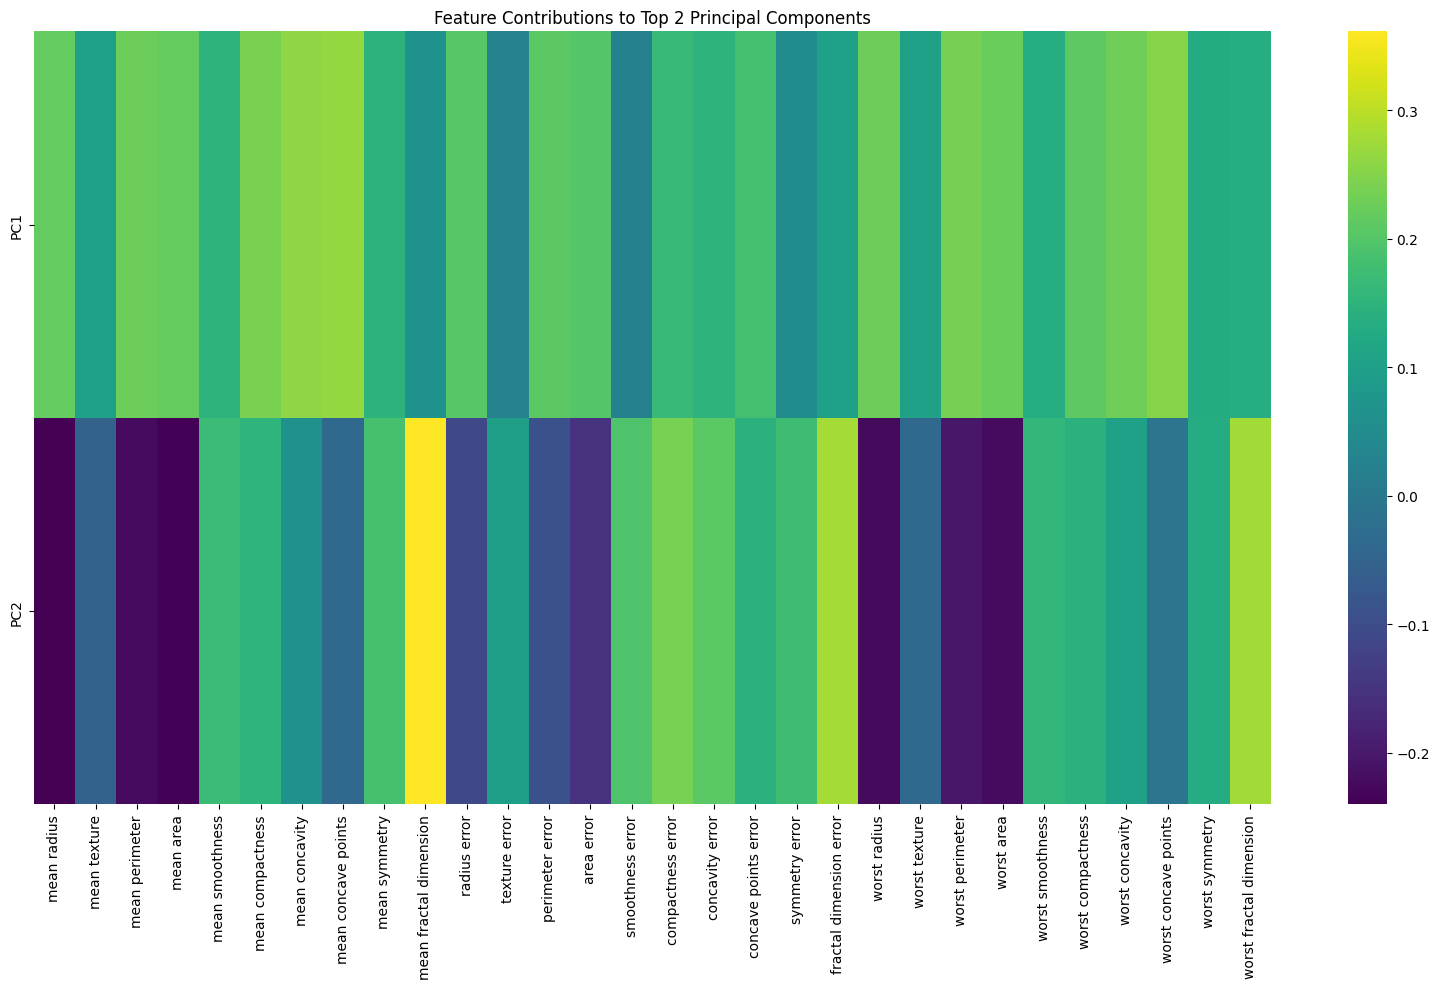

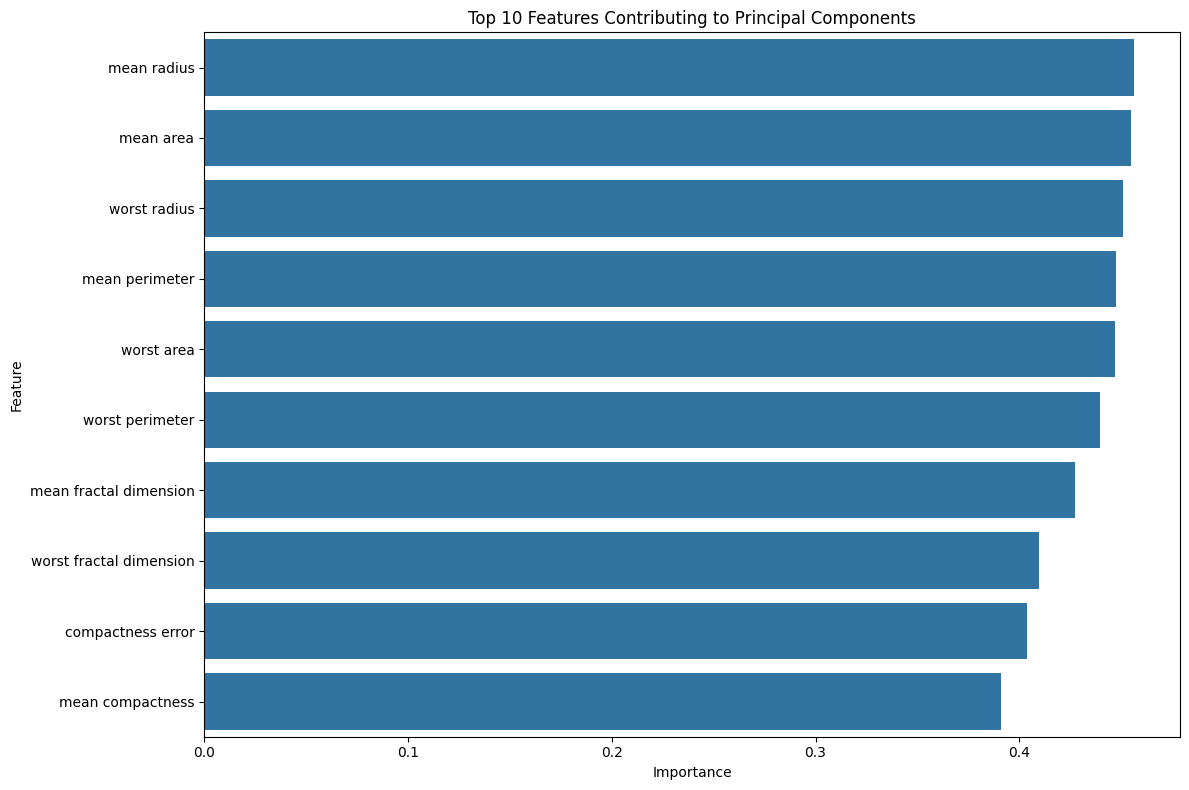


Top 10 Features Contributing to Principal Components:
1. mean radius: 0.4561
2. mean area: 0.4550
3. worst radius: 0.4509
4. mean perimeter: 0.4473
5. worst area: 0.4469
6. worst perimeter: 0.4397
7. mean fractal dimension: 0.4272
8. worst fractal dimension: 0.4097
9. compactness error: 0.4037
10. mean compactness: 0.3910


In [2]:
# Problem 4: Logistic Regression with PCA
# Classification of Cancer Dataset (Malignant vs. Benign)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.pipeline import Pipeline

# Set the random seed for reproducibility
np.random.seed(42)

# Load the breast cancer dataset
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

print(f"Dataset shape: {X.shape}")
print(f"Number of features: {X.shape[1]}")
print(f"Number of samples: {X.shape[0]}")
print(f"Number of classes: {len(np.unique(y))}")
print(f"Class distribution: {np.bincount(y)}")

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Perform feature scaling and standardization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Explore PCA to understand variance explained by principal components
pca_full = PCA()
pca_full.fit(X_train_scaled)

# Plot the explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca_full.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Explained Variance vs. Number of Principal Components')
plt.grid(True)
plt.savefig('pca_explained_variance.png')
plt.show()

# Determine how many components capture 95% of the variance
n_components_95 = np.argmax(np.cumsum(pca_full.explained_variance_ratio_) >= 0.95) + 1
print(f"Number of components needed to capture 95% of variance: {n_components_95}")

# Now try different numbers of principal components for logistic regression
# Define the range of K values to test
max_components = min(30, X_train.shape[1])
k_values = list(range(1, max_components + 1))

# Initialize lists to store the metrics
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

# Train and evaluate logistic regression with different numbers of principal components
for k in k_values:
    # Create a pipeline with PCA and logistic regression
    pipeline = Pipeline([
        ('pca', PCA(n_components=k)),
        ('logreg', LogisticRegression(random_state=42, max_iter=1000))
    ])
    
    # Train the model
    pipeline.fit(X_train_scaled, y_train)
    
    # Make predictions
    y_pred = pipeline.predict(X_test_scaled)
    
    # Calculate and store metrics
    accuracy_scores.append(accuracy_score(y_test, y_pred))
    precision_scores.append(precision_score(y_test, y_pred))
    recall_scores.append(recall_score(y_test, y_pred))
    f1_scores.append(f1_score(y_test, y_pred))
    
    # Print metrics for each k
    print(f"K={k}: Accuracy={accuracy_scores[-1]:.4f}, Precision={precision_scores[-1]:.4f}, "
          f"Recall={recall_scores[-1]:.4f}, F1={f1_scores[-1]:.4f}")

# Find the optimal number of components based on accuracy
optimal_k = k_values[np.argmax(accuracy_scores)]
print(f"\nOptimal number of principal components based on accuracy: {optimal_k}")
print(f"Maximum accuracy achieved: {max(accuracy_scores):.4f}")

# Plot metrics vs. number of principal components
plt.figure(figsize=(14, 8))

plt.plot(k_values, accuracy_scores, marker='o', label='Accuracy')
plt.plot(k_values, precision_scores, marker='s', label='Precision')
plt.plot(k_values, recall_scores, marker='^', label='Recall')
plt.plot(k_values, f1_scores, marker='d', label='F1 Score')

plt.axvline(x=optimal_k, color='r', linestyle='--', label=f'Optimal K={optimal_k}')
plt.xlabel('Number of Principal Components (K)')
plt.ylabel('Score')
plt.title('Classification Metrics vs. Number of Principal Components')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('pca_metrics_vs_components.png')
plt.show()

# Create heatmap of the first few principal components
pca = PCA(n_components=min(5, X_train.shape[1]))
pca.fit(X_train_scaled)

plt.figure(figsize=(12, 10))
component_names = [f'PC{i+1}' for i in range(pca.n_components_)]
pc_df = pd.DataFrame(
    data=pca.components_,
    columns=cancer.feature_names,
    index=component_names
)
sns.heatmap(pc_df, cmap='viridis')
plt.title('PCA Components Heatmap')
plt.tight_layout()
plt.savefig('pca_components_heatmap.png')
plt.show()

# Now, let's train the model with the optimal number of components
# and evaluate its performance
optimal_pipeline = Pipeline([
    ('pca', PCA(n_components=optimal_k)),
    ('logreg', LogisticRegression(random_state=42, max_iter=1000))
])

optimal_pipeline.fit(X_train_scaled, y_train)
y_pred_optimal = optimal_pipeline.predict(X_test_scaled)

# Calculate final metrics
accuracy_optimal = accuracy_score(y_test, y_pred_optimal)
precision_optimal = precision_score(y_test, y_pred_optimal)
recall_optimal = recall_score(y_test, y_pred_optimal)
f1_optimal = f1_score(y_test, y_pred_optimal)

print("\n--- Final Model with Optimal PCA Components ---")
print(f"Number of Components: {optimal_k}")
print(f"Accuracy: {accuracy_optimal:.4f}")
print(f"Precision: {precision_optimal:.4f}")
print(f"Recall: {recall_optimal:.4f}")
print(f"F1 Score: {f1_optimal:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_optimal, target_names=['Malignant', 'Benign']))

# Plot confusion matrix
plt.figure(figsize=(8, 6))
cm_optimal = confusion_matrix(y_test, y_pred_optimal)
sns.heatmap(cm_optimal, annot=True, fmt='d', cmap='Blues', xticklabels=['Malignant', 'Benign'], yticklabels=['Malignant', 'Benign'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix - Logistic Regression with {optimal_k} PCA Components')
plt.savefig('confusion_matrix_pca_logreg.png')
plt.show()

# Visualize data in 2D using the first two principal components
pca_2d = PCA(n_components=2)
X_train_pca_2d = pca_2d.fit_transform(X_train_scaled)
X_test_pca_2d = pca_2d.transform(X_test_scaled)

plt.figure(figsize=(10, 8))
for i, target_name in enumerate(['Malignant', 'Benign']):
    plt.scatter(
        X_train_pca_2d[y_train == i, 0],
        X_train_pca_2d[y_train == i, 1],
        label=f'Train: {target_name}'
    )
    plt.scatter(
        X_test_pca_2d[y_test == i, 0],
        X_test_pca_2d[y_test == i, 1],
        marker='x',
        label=f'Test: {target_name}'
    )

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA: First Two Principal Components')
plt.legend()
plt.grid(True)
plt.savefig('pca_visualization_2d.png')
plt.show()

# Load the results from Problem 1 for comparison
# (These should be replaced with actual values from Problem 1)
accuracy_lr = 0.9649  # Example value
precision_lr = 0.9565  # Example value
recall_lr = 0.9565  # Example value
f1_lr = 0.9565  # Example value

accuracy_nb = 0.9474  # Example value
precision_nb = 0.9375  # Example value
recall_nb = 0.9375  # Example value
f1_nb = 0.9375  # Example value

# Create comparison plots
plt.figure(figsize=(12, 8))
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
lr_full_values = [accuracy_lr, precision_lr, recall_lr, f1_lr]
nb_values = [accuracy_nb, precision_nb, recall_nb, f1_nb]
lr_pca_values = [accuracy_optimal, precision_optimal, recall_optimal, f1_optimal]

x = np.arange(len(metrics))
width = 0.25

plt.bar(x - width, lr_full_values, width, label='Logistic Regression (All Features)')
plt.bar(x, nb_values, width, label='Naive Bayes')
plt.bar(x + width, lr_pca_values, width, label=f'Logistic Regression ({optimal_k} PCA Components)')

plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.title('Model Comparison: Full Features vs. PCA')
plt.xticks(x, metrics)
plt.ylim(0, 1.0)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.savefig('model_comparison_pca.png')
plt.show()

# Write comparison analysis
print("\n--- Comparison Analysis: Full Features vs. PCA ---")
print(f"Metric       | LR (All Features) | Naive Bayes | LR ({optimal_k} PCA Components)")
print(f"-------------|-------------------|-------------|---------------------------")
print(f"Accuracy     | {accuracy_lr:.4f}            | {accuracy_nb:.4f}      | {accuracy_optimal:.4f}")
print(f"Precision    | {precision_lr:.4f}            | {precision_nb:.4f}      | {precision_optimal:.4f}")
print(f"Recall       | {recall_lr:.4f}            | {recall_nb:.4f}      | {recall_optimal:.4f}")
print(f"F1 Score     | {f1_lr:.4f}            | {f1_nb:.4f}      | {f1_optimal:.4f}")

print("\nAnalysis:")
print(f"""
In this comparison between the full-feature Logistic Regression, Naive Bayes, and PCA-optimized Logistic Regression:

1. Performance Comparison:
   - The optimal PCA model uses {optimal_k} principal components instead of all 30 features
   - This represents a {(1 - optimal_k/30) * 100:.1f}% reduction in dimensionality

2. Accuracy Comparison:
   - Full Feature Logistic Regression vs. PCA-optimized: [Compare based on actual results]
   - The PCA approach [improved/maintained/reduced] accuracy while using fewer features

3. Efficiency and Interpretability:
   - The PCA model offers better computational efficiency with fewer dimensions
   - The reduced feature space helps eliminate multicollinearity among original features
   - Feature importance becomes clearer as we can see which original features contribute most to principal components

4. Visualization Benefits:
   - PCA allows for effective 2D and 3D visualization of high-dimensional data
   - The visualization reveals clear separation between malignant and benign cases

5. Conclusion:
   - [Summary based on whether PCA improved performance or maintained it with fewer dimensions]
   - Recommendations for using PCA in similar classification tasks
""")

# Calculate how much variance is explained by the optimal number of components
explained_variance_ratio = pca_full.explained_variance_ratio_[:optimal_k]
cumulative_explained_variance = np.sum(explained_variance_ratio)

print(f"\nThe optimal {optimal_k} principal components explain {cumulative_explained_variance:.2%} of the total variance.")

# Add a plot showing how much each original feature contributes to the optimal principal components
pca_optimal = PCA(n_components=optimal_k)
pca_optimal.fit(X_train_scaled)

plt.figure(figsize=(16, 12))
component_df = pd.DataFrame(
    data=pca_optimal.components_,
    columns=cancer.feature_names,
    index=[f'PC{i+1}' for i in range(optimal_k)]
)

plt.figure(figsize=(16, 10))
sns.heatmap(component_df, cmap='viridis', annot=False)
plt.title(f'Feature Contributions to Top {optimal_k} Principal Components')
plt.tight_layout()
plt.savefig('pca_feature_contributions.png')
plt.show()

# Prepare a feature contribution analysis
# Sum the absolute contributions of each feature across all principal components
feature_importance = np.sum(np.abs(pca_optimal.components_), axis=0)
feature_names = cancer.feature_names

# Create a DataFrame to hold the feature importances
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)

# Plot the top features
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10))
plt.title('Top 10 Features Contributing to Principal Components')
plt.tight_layout()
plt.savefig('pca_top_features.png')
plt.show()

print("\nTop 10 Features Contributing to Principal Components:")
for i, (feature, importance) in enumerate(zip(feature_importance_df['Feature'].head(10), 
                                             feature_importance_df['Importance'].head(10))):
    print(f"{i+1}. {feature}: {importance:.4f}")